In [1]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1 #pip 是一個 Python 安裝管理套件工具，將pycocotools和pyyaml套件安裝進來
import torch, torchvision #將torch, torchvision模組導入進來 torchvision是獨立於pytorch的關於圖像操作的一些方便工具庫 Torch是一個開源的機器學習庫
print(torch.__version__, torch.cuda.is_available()) #印出torch版本及torch cuda當前的狀態
!gcc --version #用gcc顯示當前版本
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 4.3MB/s 
     |████████████████████████████████| 2.2MB 11.7MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201103-cp36-none-any.whl size=44309 sha256=9f4b380d9473723b703d415aa81550eefe2294abbc79b26f1c8951b221b4e204
  Stored in directory: /root/.cache/pip/wheels/9e/69/d8/9f4458580817c37c0b844fd4f20379a29c314ef50332d0379e
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


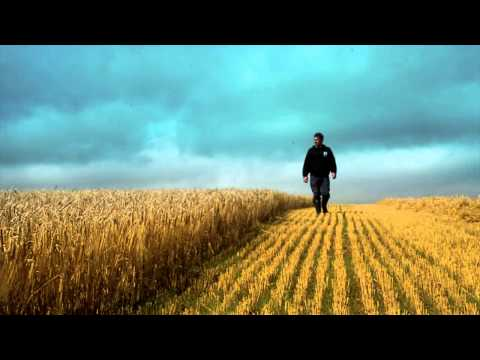

In [3]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display #嵌入外部資源，用impor將youtube及顯示模組導入進來
video = YouTubeVideo("gs415cKPASA", width=500) #建立一個變數為video，將youtube的影片導入進來，並設定高度
display(video) #將video顯示出來

In [4]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl #通過pip安裝youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python #通過pip卸載opencv-python-headless模組及opencv-contrib-python模組
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=gs415cKPASA -f 22 -o video.mp4 #將影片網址導入進來，用-f將轉換檔案格式的指令指定成22
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4 #ffmpeg 是一個多媒體處理工具，-i指定需要處理的影片檔名，-t是分割的長度，video-clip.mp4為合併出來的檔案

     |████████████████████████████████| 1.8MB 4.9MB/s 
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 1s (484 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
[youtube] gs415cKPASA: Downloading webpage
[download]

In [5]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2 #用clone指令會把https://github.com/facebookresearch/detectron2網頁內的專案的內容複製一份到你的電腦裡
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl 

Cloning into 'detectron2'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 7978 (delta 4), reused 11 (delta 4), pack-reused 7946
Receiving objects: 100% (7978/7978), 3.51 MiB | 26.02 MiB/s, done.
Resolving deltas: 100% (5687/5687), done.
Failed to load OpenCL runtime
[11/03 05:42:33 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[11/03 05:42:44 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[11/03 05:42:44 fvcore.common.download]: Downloading from https://dl.fbaipublicfiles.com/detectron2/CO

In [6]:
# Download the results
from google.colab import files #嵌入外部資源，用impor將file模組導入進來
files.download('10sec.mkv') #檔案下載，將10sec.mkv下載下來

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>